In order to make Python aware of ZEN Scripting DLLs one must register those in order to make them available for the COM interface. This is done be running the <b>regScripting_Release.bat</b> as adminsitrator. A detailed description on how to to this can be found inside the application note: <b>Control ZEN form Python</b>.

To run this notebook the follwing files are required:

- <b>regScripting.bat</b>

Additionally the tools from <b>BioFormatsRead</b> are required

This notebook demonstrates the capabilities of the .COM interface
used to establish a connection between ZEN Blue and Python.
This connection allows to use ZEN Blue OAD Simple-API within a python script.

In [2]:
# define path to bftools
import sys
sys.path.append(r'c:\Users\M1SRH\OneDrive - Carl Zeiss AG\Python_Projects\BioFormatsRead')

import bftools as bf
import win32com.client
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# specify where to find the bioformats_package.jar - modify path to your needs

#bfpackage = r'c:\Users\M1SRH\Documents\Software\BioFormats_Package\5.1.10\bioformats_package.jar'
bfpackage = r'c:\Users\M1SRH\Documents\Software\BioFormats_Package\5.8.0\bioformats_package.jar'
bf.set_bfpath(bfpackage)

# use for BioFormtas <= 5.1.10
#urlnamespace = 'http://www.openmicroscopy.org/Schemas/OME/2015-01'
# use for BioFormtas > 5.2.0
urlnamespace = 'http://www.openmicroscopy.org/Schemas/OME/2016-06'

In [4]:
# Import the ZEN OAD Scripting into Python
Zen = win32com.client.GetActiveObject("Zeiss.Micro.Scripting.ZenWrapperLM")

# Get the active image from ZEN
CZIfilename = Zen.Application.Documents.ActiveDocument.FileName

# sho the filename of the active image
print('Active Image: ', CZIfilename)

Active Image:  C:\Users\M1SRH\Documents\Testdata_Zeiss\Atomic\XRM\Raw-HR-NLM_Z200-400.czi


In [5]:
# get image meta-information
MetaInfo = bf.get_relevant_metainfo_wrapper(CZIfilename, namespace=urlnamespace, bfpath=bfpackage, showinfo=False)
bf.showtypicalmetadata(MetaInfo, namespace=urlnamespace, bfpath=bfpackage)

Multi-Resolution API not enabled yet.
Retrieving Image Dimensions ...
T:  1 Z:  201 C:  1 X:  600 Y:  600
Using czifile.py to get CZI Shape info.
Using BioFormats to get MetaInformation.
Try to read objective name via czifile.py
Problem reading Detector Model.
Problem reading Detector Name.
No suitable detector ID found. Using default = 0.


OME NameSpace used   :  http://www.openmicroscopy.org/Schemas/OME/2016-06
BF Version used      :  c:\Users\M1SRH\Documents\Software\BioFormats_Package\5.8.0\bioformats_package.jar
-------------------------------------------------------------
Image Directory      :  C:\Users\M1SRH\Documents\Testdata_Zeiss\Atomic\XRM
Image Filename       :  Raw-HR-NLM_Z200-400.czi
MutiResolution       :  False
Series Dimensions    :  [(600, 600)]
Images Dim Sizes [0] :  [1, 1, 201, 1, 600, 600]
Dimension Order BF   :  XYCZT
Dimension Order CZI  :  ZYX0
Shape CZI            :  (201, 600, 600, 1)
Total Series Number  :  1
Image Dimensions     :  1 1 201 1 600 600
Scali

In [6]:
try:
    img6d, readstate = bf.get_image6d(CZIfilename, MetaInfo['Sizes'])
    arrayshape = np.shape(img6d)
except:
    arrayshape = []
    print('Could not read image data into NumPy array.')

Since <b>imshow</b> can only handle 2D images one must use the correct indicies.

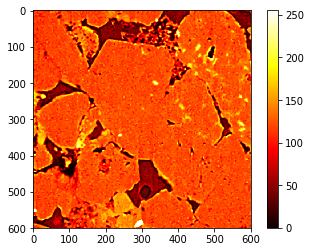

In [8]:
# 6D=Scences-Time-Z-CH-X-Y
S=0
T=0
Z=70
CH=0

imgplot = plt.imshow(img6d[S, T, Z, CH, :, :])
imgplot.set_cmap('hot')
plt.colorbar()